# Section 1.2 Model Fitting

In [2]:
import pymc3 as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

Now its your turn to work through an example inspired from Richard McElreath's, also excellent, book [Statistical Rethinking](https://www.amazon.com/Statistical-Rethinking-Bayesian-Examples-Chapman/dp/1482253445/)

## How much of a planet is covered in water?
Good news, You're an astronomer that just discovered a new planet. Bad news, your telescope has a small field of view and you can only see one tiny point on the planet at a time. More bad news, you're also a starving grad student and you can only take 5 measurements on your monthly stipend. 

**How much of the planet is covered in water?**

## Activity: Estimate the Proportion of Water

You are trying to estimate $\theta$ where
$$\theta = \text{Proportion of Water on the planet}$$

Your model is formulated as follows

$$ 
\theta = Uniform(0,1) \\
p_{water} = Binom(\theta)
$$

### Exercise 1
* What is the prior in this model?

Type your answer here

### Exercise 2
* What is the likelihood in the model?

Type your answer here

### Exercise 3
Using the data provided below fit your model to estimate the proportion of water on the planet using pystan or PyMC3

*Hint:*
In the solutions we have provided models for you.

In [7]:
# A value of 0 signifies a land observation, a value of 1 signifies a water observation
observations = [0, 0, 1, 0, 1]
water_observations = sum(observations)
total_observations = len(observations)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:04<00:00, 2246.81draws/s]
/Users/canyon/.miniconda3/envs/bayestutorial/lib/python3.7/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x127dba2b0>],
      dtype=object)

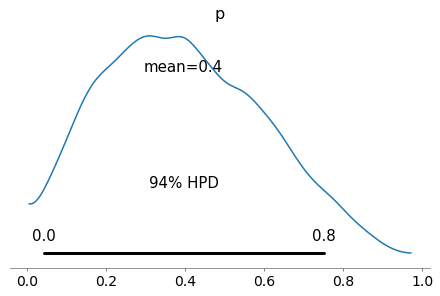

In [9]:
with pm.Model() as planetmodel:
    p_water = pm.Uniform("p", 0 ,1)
    w = pm.Binomial("w", p=p_water, n=total_observations, observed=water_observations)
    trace = pm.sample(5000, chains=2)

### Activity 4: Try out a couple ArviZ functions
Convert your inference data to `az.InferenceData` using the methods `az.from_pymc3` or `az.from_stan`. Then try a couple plots such as 

* az.plot_trace
* az.plot_forest
* az.plot_autocorr

Try running a summary functions such as 

* az.summary

For now don't worry too much about how to interpret these plots and statistics. This will be covered as we continue in the tutorial

In [10]:
# Convert PPL data to az.InferenceData
inference_data = az.from_pymc3(trace)

/Users/canyon/.miniconda3/envs/bayestutorial/lib/python3.7/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


In [14]:
az.summary(inference_data)

,mean,sd,mc error,hpd 3%,hpd 97%,ess,r_hat
p,0.39,0.2,0.0,0.04,0.75,3696.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127df2be0>,
      dtype=object)

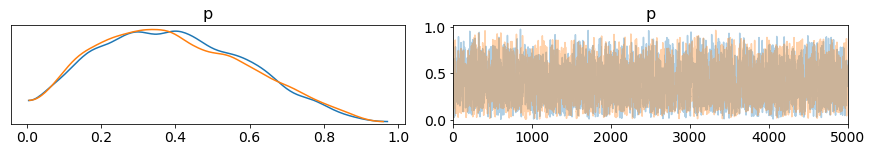

In [11]:
az.plot_trace(inference_data)

(<Figure size 432x302.4 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a2959e8>],
       dtype=object))

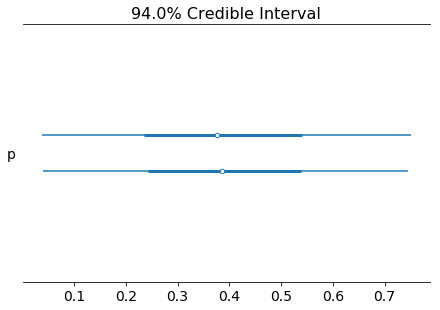

In [12]:
az.plot_forest(inference_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a2208d0>,
      dtype=object)

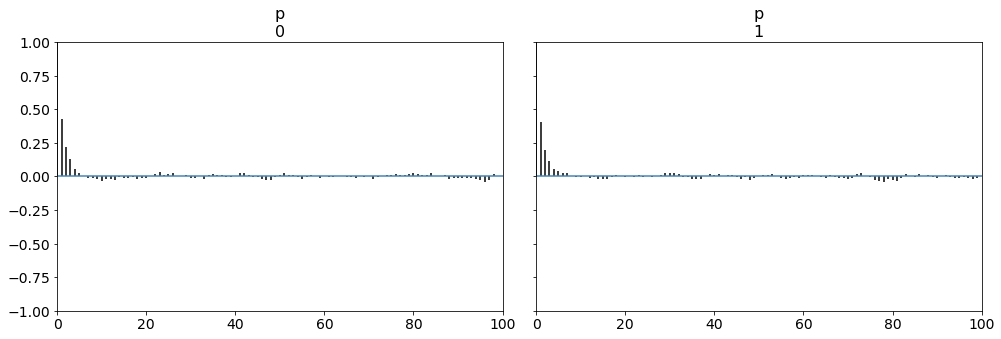

In [13]:
az.plot_autocorr(inference_data)

### Bonus Activities
 * Modify your observations. Add more and see how the plots change
     * Tip: Quickly increase the number of observations with np.repeat or with in lists with * operator as follows `[0,1]*100`